# Python Codes for Group 9 Project

**Project Topic:** Is it wise to add cryptocurrencies to an investment portfolio?

**Group Members:** Yu-Chien Chang, Ian He, Thomas Theodor Kjoelbye.

**Date:** December 17, 2021

In [1]:
import pandas as pd
import pandas_datareader
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import seaborn as sns
import numpy as np
import math
from scipy.stats import describe
from functools import reduce

## Load and Clean Data

In [2]:
coin_list = ['FTSE', 'SHCOMP', 'sp500', 'btc']

# Use a dict to store different DataFrame
coin_dictionary = {}
for coin in coin_list:
    file_name = coin + '.csv'
    coin_dictionary[coin] = pd.read_csv(file_name, parse_dates=['Date'])

In [3]:
coin_dictionary['btc'].rename(columns={'PriceUSD':'Close'}, inplace=True)

In [4]:
for coin in coin_list:
    coin_suffix = '_' + coin
    coin_dictionary[coin] = coin_dictionary[coin].add_suffix(coin_suffix)

In [5]:
for coin in coin_list:
    date_suffix = 'Date_' + coin
    coin_dictionary[coin]['date'] = coin_dictionary[coin][date_suffix]

In [6]:
for coin in coin_list:
    coin_dictionary[coin].columns = coin_dictionary[coin].columns.str.strip()

In [7]:
data_list = []
for coin in coin_list:
    data_list.append(coin_dictionary[coin])

In [8]:
coin_combined = reduce(lambda  left,right: pd.merge(left,right, on='date', how='left'), data_list)
coin_combined.head()

,Date_FTSE,Open_FTSE,High_FTSE,Low_FTSE,Close_FTSE,date,Date_SHCOMP,Open_SHCOMP,High_SHCOMP,Low_SHCOMP,...,TxTfrCnt_btc,TxTfrValAdjNtv_btc,TxTfrValAdjUSD_btc,TxTfrValMeanNtv_btc,TxTfrValMeanUSD_btc,TxTfrValMedNtv_btc,TxTfrValMedUSD_btc,VelCur1yr_btc,VtyDayRet180d_btc,VtyDayRet30d_btc
0,2021-10-27,7277.62,7280.45,7247.25,7253.27,2021-10-27,2021-10-27,3589.86,3589.86,3553.13,...,826953,285963.4085,1.674697e+10,0.855444,50097.65679,0.002808,164.448776,13.856171,0.041465,0.035439
1,2021-10-26,7222.82,7281.17,7222.82,7277.62,2021-10-26,2021-10-26,3612.83,3625.02,3589.71,...,855129,379145.9173,2.289813e+10,1.034330,62467.29045,0.002500,150.984951,13.852338,0.041774,0.034911
2,2021-10-25,7204.55,7247.53,7204.55,7222.82,2021-10-25,2021-10-25,3574.26,3611.09,3564.21,...,836322,299498.9098,1.887792e+10,0.838478,52850.67378,0.002542,160.234076,13.837786,0.041683,0.033397
3,2021-10-22,7190.30,7235.19,7190.30,7204.55,2021-10-22,2021-10-22,3594.75,3607.58,3578.76,...,813864,266916.2485,1.621542e+10,0.837013,50849.35023,0.002474,150.316726,13.833234,0.042241,0.034949
4,2021-10-21,7223.10,7227.06,7181.70,7190.30,2021-10-21,2021-10-21,3590.05,3610.96,3576.35,...,900217,359754.4627,2.243928e+10,0.908851,56688.55740,0.002402,149.833924,13.843939,0.042243,0.035949


In [9]:
coin_combined['date'] = pd.to_datetime(coin_combined['date'])

In [10]:
coin_combined.set_index('date', inplace=True)
coin_combined.sort_index(inplace=True)
coin_combined.head()

,Date_FTSE,Open_FTSE,High_FTSE,Low_FTSE,Close_FTSE,Date_SHCOMP,Open_SHCOMP,High_SHCOMP,Low_SHCOMP,Close_SHCOMP,...,TxTfrCnt_btc,TxTfrValAdjNtv_btc,TxTfrValAdjUSD_btc,TxTfrValMeanNtv_btc,TxTfrValMeanUSD_btc,TxTfrValMedNtv_btc,TxTfrValMedUSD_btc,VelCur1yr_btc,VtyDayRet180d_btc,VtyDayRet30d_btc
date,,,,,,,,,,,,,,,,,,,,,
2010-07-01,2010-07-01,4916.72,4916.72,4790.04,4805.75,2010-07-01,2393.95,2410.77,2371.78,2373.79,...,91,25358.89,NaN,303.328681,NaN,50.0,NaN,0.773177,NaN,NaN
2010-07-02,2010-07-02,4806.18,4880.88,4806.18,4838.09,2010-07-02,2371.32,2386.40,2319.74,2382.90,...,95,59578.67,NaN,1168.081158,NaN,50.0,NaN,0.805863,NaN,NaN
2010-07-05,2010-07-05,4838.12,4863.35,4821.09,4823.53,2010-07-05,2358.76,2378.09,2335.57,2363.95,...,77,51957.01,NaN,688.272857,NaN,50.0,NaN,0.830679,NaN,NaN
2010-07-06,2010-07-06,4823.61,4967.65,4823.61,4965.00,2010-07-06,2358.28,2409.78,2356.55,2409.42,...,45,19535.50,NaN,434.122222,NaN,50.0,NaN,0.834550,NaN,NaN
2010-07-07,2010-07-07,4964.70,5014.82,4891.97,5014.82,2010-07-07,2407.66,2421.68,2392.57,2421.12,...,90,27072.15,NaN,572.981222,NaN,50.0,NaN,0.848451,NaN,NaN


In [11]:
df = coin_combined.loc['2010-07-18':'2021-10-27']
df

,Date_FTSE,Open_FTSE,High_FTSE,Low_FTSE,Close_FTSE,Date_SHCOMP,Open_SHCOMP,High_SHCOMP,Low_SHCOMP,Close_SHCOMP,...,TxTfrCnt_btc,TxTfrValAdjNtv_btc,TxTfrValAdjUSD_btc,TxTfrValMeanNtv_btc,TxTfrValMeanUSD_btc,TxTfrValMedNtv_btc,TxTfrValMedUSD_btc,VelCur1yr_btc,VtyDayRet180d_btc,VtyDayRet30d_btc
date,,,,,,,,,,,,,,,,,,,,,
2010-07-19,2010-07-19,5158.67,5196.77,5111.89,5148.28,2010-07-19,2399.58,2484.19,2392.27,2475.42,...,512,40243.7300,3.251693e+03,86.951152,7.025653,2.625000,0.212100,1.828863,NaN,NaN
2010-07-20,2010-07-20,5148.81,5179.99,5090.57,5139.46,2010-07-20,2477.75,2530.33,2477.46,2528.73,...,738,16063.2300,1.200497e+03,42.528835,3.178423,1.375000,0.102762,1.831412,NaN,NaN
2010-07-21,2010-07-21,5140.09,5244.88,5140.09,5214.64,2010-07-21,2529.62,2553.45,2520.15,2535.39,...,377,20834.1500,1.649916e+03,71.822334,5.687816,18.500000,1.465068,1.833749,NaN,NaN
2010-07-22,2010-07-22,5214.43,5319.48,5180.98,5313.81,2010-07-22,2525.98,2563.24,2522.20,2562.41,...,344,33049.0300,1.932369e+03,112.714622,6.590397,1.010000,0.059054,1.840245,NaN,NaN
2010-07-23,2010-07-23,5314.01,5328.51,5272.67,5312.62,2010-07-23,2566.85,2579.52,2549.24,2572.03,...,335,19258.7500,1.166943e+03,63.158149,3.826934,5.000000,0.302964,1.841192,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-21,2021-10-21,7223.10,7227.06,7181.70,7190.30,2021-10-21,3590.05,3610.96,3576.35,3594.78,...,900217,359754.4627,2.243928e+10,0.908851,56688.557400,0.002402,149.833924,13.843939,0.042243,0.035949
2021-10-22,2021-10-22,7190.30,7235.19,7190.30,7204.55,2021-10-22,3594.75,3607.58,3578.76,3582.60,...,813864,266916.2485,1.621542e+10,0.837013,50849.350230,0.002474,150.316726,13.833234,0.042241,0.034949
2021-10-25,2021-10-25,7204.55,7247.53,7204.55,7222.82,2021-10-25,3574.26,3611.09,3564.21,3609.86,...,836322,299498.9098,1.887792e+10,0.838478,52850.673780,0.002542,160.234076,13.837786,0.041683,0.033397


In [12]:
df = df.filter(like='Close')

In [13]:
df_rate = df.copy(deep=True)
df_rate

,Close_FTSE,Close_SHCOMP,Close_sp500,Close_btc
date,,,,
2010-07-19,5148.28,2475.42,1071.25,0.080800
2010-07-20,5139.46,2528.73,1083.48,0.074736
2010-07-21,5214.64,2535.39,1069.59,0.079193
2010-07-22,5313.81,2562.41,1093.67,0.058470
2010-07-23,5312.62,2572.03,1102.66,0.060593
...,...,...,...,...
2021-10-21,7190.30,3594.78,4549.78,62373.885620
2021-10-22,7204.55,3582.60,4544.90,60750.967370
2021-10-25,7222.82,3609.86,4566.48,63031.672900


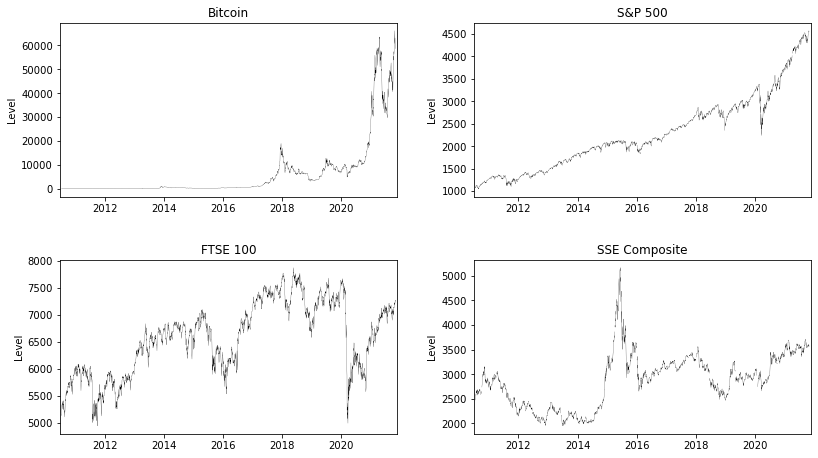

In [14]:
# Line plots of daily returns of Bitcoin and three indices

fig, ax = plt.subplots(2, 2, figsize=(12,7)) 

column_list = ['Close_btc', 'Close_sp500', 'Close_FTSE', 'Close_SHCOMP']
ylabel_list = ['Bitcoin', 'S&P 500', 'FTSE 100', 'SSE Composite']

i = 0

for r in range(2):
    for c in range(2):
        df = column_list[i]
        ylab = ylabel_list[i]
        
        ax[r][c].plot(df_rate.index, df_rate[df], color='black', linewidth = 0.2)  
        ax[r][c].set_ylabel('Level')
        ax[r][c].set_title(ylab)
        ax[r][c].xaxis.set_major_locator(mdates.YearLocator(2))
        ax[r][c].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
        ax[r][c].set_xlim(dt.datetime(2010,7,1), dt.datetime(2021,11,23))
        #sns.despine(ax=ax[r][c])
        
        i += 1
    
fig.tight_layout(pad=3.0)

plt.savefig('Figure 1 Daily Return Trend.pdf', bbox_inches='tight')

In [15]:
df_rate['btc_growth'] = df_rate['Close_btc'].pct_change()*100
df_rate['sp_growth'] = df_rate['Close_sp500'].pct_change()*100
df_rate['shcomp_growth'] = df_rate['Close_SHCOMP'].pct_change()*100
df_rate['ftse_growth'] = df_rate['Close_FTSE'].pct_change()*100

In [16]:
df_rate = df_rate[['sp_growth','ftse_growth','shcomp_growth','btc_growth']]

In [17]:
# Create two more sub-periods
df_rate_2017 = df_rate.loc['2017-01-01':'2021-10-27']
df_rate_covid = df_rate.loc['2020-03-01':'2021-10-27']

In [18]:
df_rate

,sp_growth,ftse_growth,shcomp_growth,btc_growth
date,,,,
2010-07-19,NaN,NaN,NaN,NaN
2010-07-20,1.141657,-0.171319,2.153574,-7.505286
2010-07-21,-1.281980,1.462800,0.263373,5.963860
2010-07-22,2.251330,1.901761,1.065714,-26.167892
2010-07-23,0.822003,-0.022394,0.375428,3.631125
...,...,...,...,...
2021-10-21,0.299591,-0.454099,0.216894,-5.582517
2021-10-22,-0.107258,0.198184,-0.338825,-2.601919
2021-10-25,0.474818,0.253590,0.760900,3.754188


## Scatter Plot of Daily Returns of Three Indices and Bitcoin

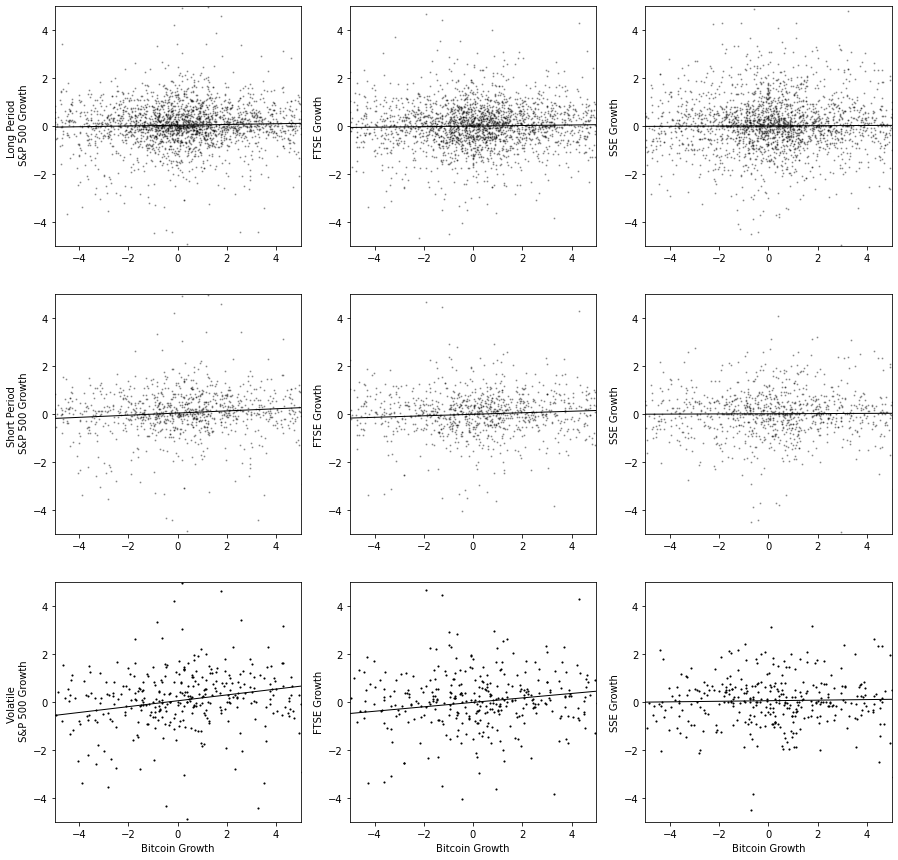

In [19]:
fig, ax = plt.subplots(3, 3,figsize=(15,15))

lc = 'black'

for i in range(0,3):

    #sns.despine(ax=ax[0][i])
    sns.regplot(x='btc_growth',                                        
            y=df_rate.columns[i],                                       
            data=df_rate,                                         
            ax = ax[0][i],                                          
            color = 'black',                                  
            ci = 0,
            scatter_kws={'s':1, 'alpha':0.3, 'color':'black'},
            line_kws={'linewidth':1, 'color':lc}
            )  
    ax[0][i].set_xlim(-5, 5)
    ax[0][i].set_ylim(-5, 5)
    ax[0][i].set(xlabel='')
    
for i in range(0,3):
    
    #sns.despine(ax=ax[1][i])
    sns.regplot(x='btc_growth',                                        
            y=df_rate_2017.columns[i],                                       
            data=df_rate_2017,                                         
            ax = ax[1][i],                                          
            color = 'black',                                  
            ci = 0,
            scatter_kws={'s':1, 'alpha':0.3, 'color':'black'},
            line_kws={'linewidth':1, 'color':lc}
            )  
    ax[1][i].set_xlim(-5, 5)
    ax[1][i].set_ylim(-5, 5)
    ax[1][i].set(xlabel='')
    
for i in range(0,3):
    ax[2][i].scatter(df_rate_covid.btc_growth, df_rate_covid.iloc[:,i],       
        color='black', s=1
       )
    #sns.despine(ax=ax[2][i])
    sns.regplot(x='btc_growth',                                        
            y=df_rate_covid.columns[i],                                       
            data=df_rate_covid,                                         
            ax = ax[2][i],                                          
            color = 'black',                                  
            ci = 0,
            scatter_kws={'s':1, 'alpha':0.3, 'color':'black'},
            line_kws={'linewidth':1, 'color':lc}
            )  
    ax[2][i].set_xlim(-5, 5)
    ax[2][i].set_ylim(-5, 5)
    ax[2][i].set(xlabel='Bitcoin Growth')

for i in range(0,3):
    ax[i][1].set(ylabel='FTSE Growth')
    ax[i][2].set(ylabel='SSE Growth')

ax[0][0].set(ylabel='Long Period \n S&P 500 Growth')
ax[1][0].set(ylabel='Short Period \n S&P 500 Growth')
ax[2][0].set(ylabel='Volatile \n S&P 500 Growth')

plt.savefig('Figure 2 Correlation.pdf', bbox_inches='tight')

plt.show()

## Calculate Correlations among Indices and Bitcoin

In [20]:
df_rate_covid.corr(method='pearson')

,sp_growth,ftse_growth,shcomp_growth,btc_growth
sp_growth,1.000000,0.645405,0.238847,0.353988
ftse_growth,0.645405,1.000000,0.271288,0.312668
shcomp_growth,0.238847,0.271288,1.000000,0.055531
btc_growth,0.353988,0.312668,0.055531,1.000000


In [21]:
df_rate_2017.corr(method='pearson')

,sp_growth,ftse_growth,shcomp_growth,btc_growth
sp_growth,1.000000,0.589985,0.184239,0.184074
ftse_growth,0.589985,1.000000,0.251134,0.149655
shcomp_growth,0.184239,0.251134,1.000000,0.017750
btc_growth,0.184074,0.149655,0.017750,1.000000


In [22]:
df_rate.corr(method='pearson')

,sp_growth,ftse_growth,shcomp_growth,btc_growth
sp_growth,1.000000,0.609236,0.145091,0.089330
ftse_growth,0.609236,1.000000,0.198475,0.068837
shcomp_growth,0.145091,0.198475,1.000000,0.020151
btc_growth,0.089330,0.068837,0.020151,1.000000


## Search for Optimal Sharpe Ratio

In [23]:
# covariance matrix for all combination

var_c_btc_sp_all = df_rate[['btc_growth', 'sp_growth']].cov()
var_c_btc_ftse_all = df_rate[['btc_growth', 'ftse_growth']].cov()
var_c_btc_shc_all = df_rate[['btc_growth', 'shcomp_growth']].cov()

var_c_btc_sp_2017 = df_rate_2017[['btc_growth', 'sp_growth']].cov()
var_c_btc_ftse_2017 = df_rate_2017[['btc_growth', 'ftse_growth']].cov()
var_c_btc_shc_2017 = df_rate_2017[['btc_growth', 'shcomp_growth']].cov()

var_c_btc_sp_covid = df_rate_covid[['btc_growth', 'sp_growth']].cov()
var_c_btc_ftse_covid = df_rate_covid[['btc_growth', 'ftse_growth']].cov()
var_c_btc_shc_covid = df_rate_covid[['btc_growth', 'shcomp_growth']].cov()

In [24]:
var_c_btc_sp_all

,btc_growth,sp_growth
btc_growth,36.088511,0.566733
sp_growth,0.566733,1.115313


In [25]:
var_c_btc_sp_all.iloc[1,0]

0.5667330692565848

In [26]:
df_rate.mean()

sp_growth        0.054989
ftse_growth      0.016789
shcomp_growth    0.020591
btc_growth       0.640046
dtype: float64

In [27]:
def sharpe_ratio(btc_r, mu, varc_mat):
    
    sr = []
    
    for a in np.arange(0.0, 1.001, 0.001):
        exp_return = a * btc_r + (1-a) * mu
        col_1 = a * varc_mat.iloc[0,0] + (1-a) * varc_mat.iloc[1,0]
        col_2 = a * varc_mat.iloc[1,0] + (1-a) * varc_mat.iloc[1,1]
        sigma = (col_1 * a + col_2 * (1-a))**0.5
        sr.append(exp_return/sigma)
        
        
    df = pd.DataFrame(list(zip(np.arange(0.0, 1.001, 0.001), sr)),
               columns =['alpha', 'val'])
    return df

In [28]:
# Sharpe ratio for all period (in DataFrame)
sr_btc_sp = sharpe_ratio(df_rate.mean()[3], df_rate.mean()[0], var_c_btc_sp_all)
sr_btc_ftse = sharpe_ratio(df_rate.mean()[3], df_rate.mean()[1], var_c_btc_ftse_all)
sr_btc_shc = sharpe_ratio(df_rate.mean()[3], df_rate.mean()[2], var_c_btc_shc_all)

# Sharpe ratio for 2017- (in DataFrame)
sr_btc_sp_2017 = sharpe_ratio(df_rate_2017.mean()[3], df_rate_2017.mean()[0], var_c_btc_sp_2017)
sr_btc_ftse_2017 = sharpe_ratio(df_rate_2017.mean()[3], df_rate_2017.mean()[1], var_c_btc_ftse_2017)
sr_btc_shc_2017 = sharpe_ratio(df_rate_2017.mean()[3], df_rate_2017.mean()[2], var_c_btc_shc_2017)

# Sharpe ratio for covid period (in DataFrame)
sr_btc_sp_covid = sharpe_ratio(df_rate_covid.mean()[3], df_rate_covid.mean()[0], var_c_btc_sp_covid)
sr_btc_ftse_covid = sharpe_ratio(df_rate_covid.mean()[3], df_rate_covid.mean()[1], var_c_btc_ftse_covid)
sr_btc_shc_covid = sharpe_ratio(df_rate_covid.mean()[3], df_rate_covid.mean()[2], var_c_btc_shc_covid)

In [29]:
# Use a dict to store optimal portfolio

list_of_datasets = [sr_btc_sp, sr_btc_sp_2017, sr_btc_sp_covid,
                    sr_btc_ftse, sr_btc_ftse_2017, sr_btc_ftse_covid,
                    sr_btc_shc, sr_btc_shc_2017, sr_btc_shc_covid]

optimal_weight = []
for sets in list_of_datasets:
    optimal_weight.append(sets['val'].idxmax())

max_sharpe = []
for sets in list_of_datasets:
    max_sharpe.append(sets['val'].max())

portfolio = ['S&P Long', 'S&P Short', 'S&P Volatile',
             'FTSE Long', 'FTSE Short', 'FTSE Volatile',
             'SSE Long', 'SSE Short', 'SSE Volatile']


optimal_portfolio = {'Portfolio':portfolio,
                     'Optimal Weight':optimal_weight,
                     'Sharpe Ratio':max_sharpe}
optimal_portfolio = pd.DataFrame(optimal_portfolio)
optimal_portfolio['Optimal Weight'] = optimal_portfolio['Optimal Weight']/1000

optimal_portfolio

,Portfolio,Optimal Weight,Sharpe Ratio
0,S&P Long,0.296,0.114790
1,S&P Short,0.353,0.098894
2,S&P Volatile,0.541,0.119379
3,FTSE Long,0.654,0.106954
4,FTSE Short,1.000,0.091670
5,FTSE Volatile,1.000,0.115872
6,SSE Long,0.616,0.107462
7,SSE Short,0.573,0.092770
8,SSE Volatile,0.341,0.124764


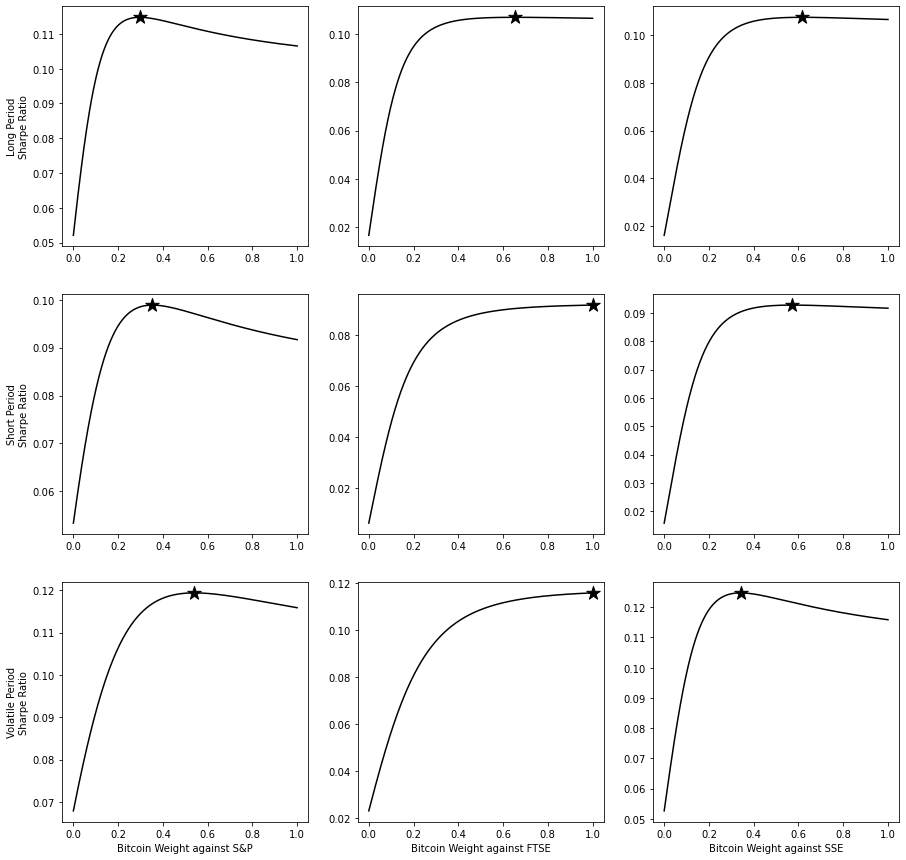

In [30]:
fig, ax = plt.subplots(3, 3,figsize=(15,15))

line_color = 'black'
marker_color = 'black'

list1 = [sr_btc_sp, sr_btc_sp_2017, sr_btc_sp_covid]
list2 = [sr_btc_ftse, sr_btc_ftse_2017, sr_btc_ftse_covid]
list3 = [sr_btc_shc, sr_btc_shc_2017, sr_btc_shc_covid]

# Create line plots
i = 0
for sets in list1:
    ax[i][0].plot(sets['alpha'], sets['val'], color=line_color)
    ax[i][0].scatter(sets['alpha'][sets['val'] == sets['val'].max()], sets['val'].max(),
                     color=marker_color, s=200, marker='*')
    i += 1

i = 0
for sets in list2:
    ax[i][1].plot(sets['alpha'], sets['val'], color=line_color)
    ax[i][1].scatter(sets['alpha'][sets['val'] == sets['val'].max()], sets['val'].max(),
                     color=marker_color, s=200, marker='*')
    i += 1

i = 0
for sets in list3:
    ax[i][2].plot(sets['alpha'], sets['val'], color=line_color)
    ax[i][2].scatter(sets['alpha'][sets['val'] == sets['val'].max()], sets['val'].max(),
                     color=marker_color, s=200, marker='*')
    i += 1

# Set labels for x- and y-axes
ax[2][0].set(xlabel='Bitcoin Weight against S&P')
ax[2][1].set(xlabel='Bitcoin Weight against FTSE')
ax[2][2].set(xlabel='Bitcoin Weight against SSE')

ax[0][0].set(ylabel='Long Period\nSharpe Ratio')
ax[1][0].set(ylabel='Short Period\nSharpe Ratio')
ax[2][0].set(ylabel='Volatile Period\nSharpe Ratio')


plt.savefig('Figure 3 Sharpe Ratio.pdf', bbox_inches='tight')

plt.show()